In [112]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import sklearn.metrics as mt
import pandas as pd
import pickle
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('dark_background')

# Dataset

In [3]:
x, y = datasets.make_moons(n_samples = 500, noise = 0.05)

In [4]:
print(f'{x.shape = }, {y.shape = }')

x.shape = (500, 2), y.shape = (500,)


In [5]:
pd.DataFrame({'x_1': x[:,0], 'x_2': x[:, 1], 'y': y})

,x_1,x_2,y
0,0.619975,0.801532,0
1,2.038232,0.260260,1
2,0.025915,0.136505,1
3,-0.258116,0.991581,0
4,0.712283,-0.536793,1
...,...,...,...
495,0.116225,-0.048115,1
496,-0.938737,0.301906,0
497,0.329478,-0.317418,1
498,-0.284167,0.945499,0


In [6]:
y.shape

(500,)

In [7]:
unique = np.unique(y, return_counts = True)
for label, qt_label in zip(unique[0], unique[1]):
  print(f'Label: {label}\t Counts: {qt_label}')

Label: 0	 Counts: 250
Label: 1	 Counts: 250


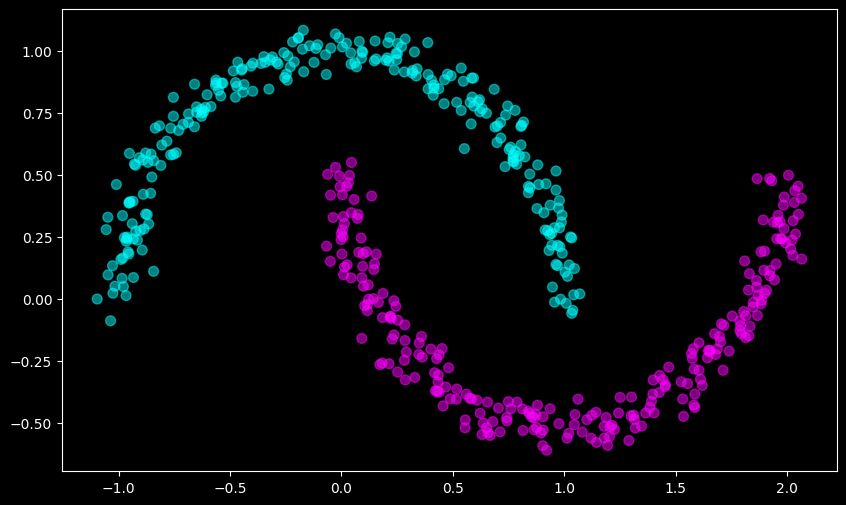

In [8]:
plt.scatter(x[:, 0], x[:, 1], c = y, s = 50, alpha = 0.5, cmap = 'cool')

In [9]:
import matplotlib as mpl
for key in mpl.colormaps.keys():
  print(key)

magma
inferno
plasma
viridis
cividis
twilight
twilight_shifted
turbo
Blues
BrBG
BuGn
BuPu
CMRmap
GnBu
Greens
Greys
OrRd
Oranges
PRGn
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples
RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
jet
nipy_spectral
ocean
pink
prism
rainbow
seismic
spring
summer
terrain
winter
Accent
Dark2
Paired
Pastel1
Pastel2
Set1
Set2
Set3
tab10
tab20
tab20b
tab20c
magma_r
inferno_r
plasma_r
viridis_r
cividis_r
twilight_r
twilight_shifted_r
turbo_r
Blues_r
BrBG_r
BuGn_r
BuPu_r
CMRmap_r
GnBu_r
Greens_r
Greys_r
OrRd_r
Oranges_r
PRGn_r
PiYG_r
PuBu_r
PuBuGn_r
PuOr_r
PuRd_r
Purples_r
RdBu_r
RdGy_r
RdPu_r
RdYlBu_r
RdYlGn_r
Reds_r
Spectral_r
Wistia_r
YlGn_r
YlGnBu_r
YlOrBr_r
YlOrRd_r
afmhot_r
autumn_r
binary_r
bone_r
brg_r
bwr_r
cool_r
coolwarm_r
copper_r
cubehelix_r
flag_r
gist_earth_r
g

# Modelo

- Inicialização dos pesos e bias
- Feedforward
- Calculo da perda
- Backpropagation
- Fit

In [56]:
class NnModel:
  def __init__(self, x: np.ndarray, y: np.ndarray, hidden_neurons: int = 10, output_neurons: int = 2):
    np.random.seed(8)
    self.x = x
    self.y = y
    self.hidden_neurons = hidden_neurons
    self.output_neurons = output_neurons
    self.input_neurons = self.x.shape[1]

    # Inicializa os pesos e bias
    # Xavier Inicialization -> variancia dos pesos igual em todas as camadas

    self.W1 = np.random.randn(self.input_neurons, self.hidden_neurons) / np.sqrt(self.input_neurons)
    self.B1 = np.zeros((1, self.hidden_neurons))
    self.W2 = np.random.randn(self.hidden_neurons, self.output_neurons) / np.sqrt(self.hidden_neurons)
    self.B2 = np.zeros((1, self.output_neurons))
    self.model_dict = {'W1': self.W1, 'B1': self.B1, 'W2': self.W2, 'B2': self.B2}
    self.z1 = 0
    self.f1 = 0

  def forward(self, x: np.ndarray) -> np.ndarray:
    # Equação da reta
    self.z1 = x.dot(self.W1) + self.B1

    # Função de ativação (1)
    self.f1 = np.tanh(self.z1)

    # Equação da reta (2)
    z2 = self.f1.dot(self.W2) + self.B2

    # Softmax
    exp_values = np.exp(z2)
    softmax = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
    return softmax


  def loss(self, softmax):
    # Cross Entropy

    predictions = np.zeros(self.y.shape[0])
    for i, correct_index in enumerate(self.y):
      predicted = softmax[i][correct_index]
      predictions[i] = predicted

    log_prob = -np.log(predicted)
    return log_prob/self.y.shape[0]


  def backpropagation(self, softmax: np.ndarray, learning_rate: float) -> None:
    delta2 = np.copy(softmax)
    delta2[range(self.x.shape[0]), self.y] -= 1
    dW2 = (self.f1.T).dot(delta2)
    dB2 = np.sum(delta2, axis = 0, keepdims=True)
    delta1 = delta2.dot(self.W2.T)*(1-np.power(np.tanh(self.z1), 2))
    dW1 = (self.x.T).dot(delta1)
    dB1 = np.sum(delta1, axis =0, keepdims=True)

    # Atualização dos pesos e bias

    self.W1 += - learning_rate*dW1
    self.W2 += - learning_rate*dW2
    self.B1 += - learning_rate*dB1
    self.B2 += - learning_rate*dB2

  def show_plot(self, predictions):
    if self.x.shape[1] == 2:
      plt.scatter(self.x[:,0], self.x[:,1], s = 50, c = predictions, cmap='cool', alpha=0.7)
      plt.show()
    elif self.x.shape[1] == 3:
      ax = plt.axes(projection = '3d')
      ax.scatter3D(x_[:,0], x_[:,1], x_[:,2], s = 40, c = predictions, cmap='cool', alpha=0.7)
      plt.show()



  def fit(self, epochs: int, lr: float, show_plot: bool = False):

    for epoch in range(epochs):

      outputs = self.forward(self.x)
      loss = self.loss(outputs)
      self.backpropagation(outputs, lr)

      # Acuracia
      prediction = np.argmax(outputs, axis = 1)
      correct = (prediction == self.y).sum()
      accuracy = correct/self.y.shape[0]


      if int((epoch+1) % (epochs/10)) == 0:
        print(f'Epoch: [{epoch + 1} / {epochs}]  Accuracy: {accuracy:.3f} Loss: {loss.item():.5f}')
        if show_plot:
          self.show_plot(prediction)

    return prediction


# Testes e resultado

In [ ]:
hidden_neurons = 50
output_neurons = 2
learning_rate = 0.002
epochs = 50

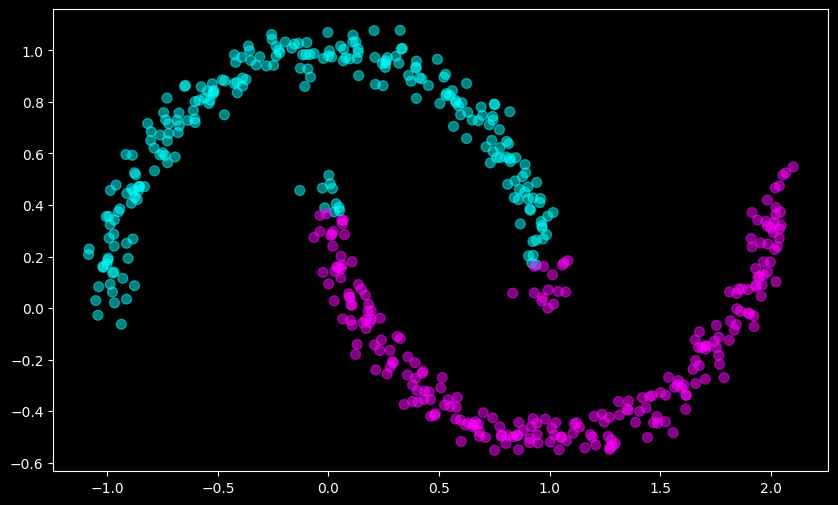

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c = result, s = 50, alpha = 0.5, cmap = 'cool')

In [ ]:
model = NnModel(x, y, hidden_neurons=hidden_neurons, output_neurons=output_neurons)
result = model.fit(epochs, learning_rate)

Epoch: [5 / 50]  Accuracy: 0.876 Loss: 0.0000
Epoch: [10 / 50]  Accuracy: 0.896 Loss: 0.0000
Epoch: [15 / 50]  Accuracy: 0.900 Loss: 0.0001
Epoch: [20 / 50]  Accuracy: 0.902 Loss: 0.0001
Epoch: [25 / 50]  Accuracy: 0.910 Loss: 0.0001
Epoch: [30 / 50]  Accuracy: 0.914 Loss: 0.0001
Epoch: [35 / 50]  Accuracy: 0.926 Loss: 0.0001
Epoch: [40 / 50]  Accuracy: 0.932 Loss: 0.0001
Epoch: [45 / 50]  Accuracy: 0.940 Loss: 0.0001
Epoch: [50 / 50]  Accuracy: 0.950 Loss: 0.0000


# Cluster dataset

## 2D

In [59]:
x_, y_ = datasets.make_blobs(n_samples=400, n_features=2, centers=4, random_state=10, cluster_std=0.9, shuffle=True)

In [24]:
x_.shape, y_.shape

((400, 2), (400,))

In [25]:
np.unique(y_, return_counts=True)

(array([0, 1, 2, 3]), array([100, 100, 100, 100]))

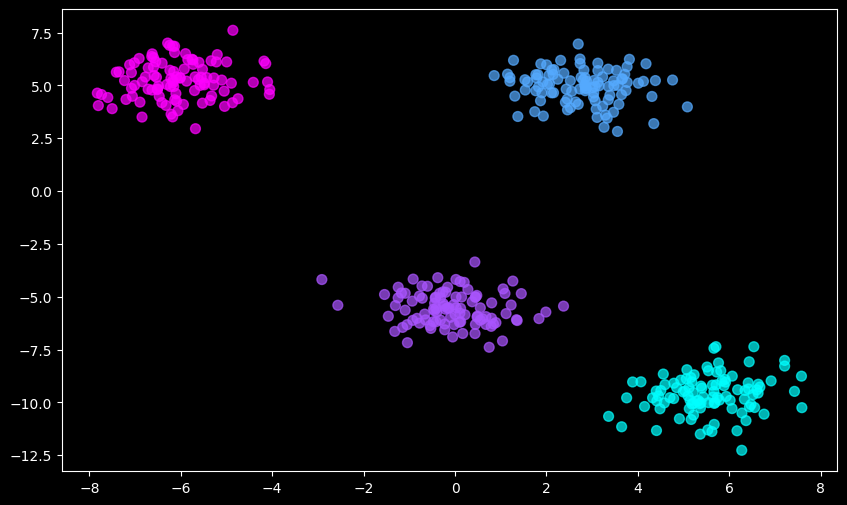

In [26]:
plt.scatter(x_[:,0], x_[:,1], s = 50, c = y_, cmap='cool', alpha=0.7)

In [60]:
hidden_neurons = 50
output_neurons = 4
learning_rate = 0.002
epochs = 50

Epoch: [100 / 1000]  Accuracy: 0.998 Loss: 0.00000


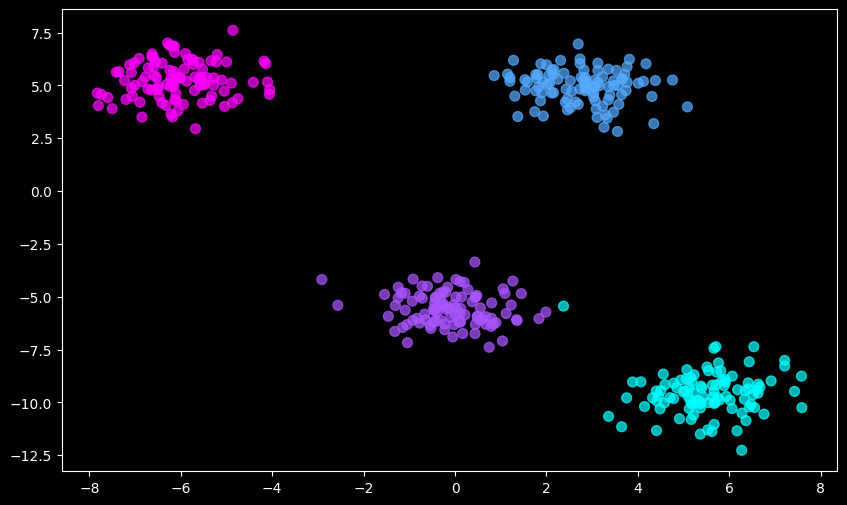

Epoch: [200 / 1000]  Accuracy: 0.998 Loss: 0.00000


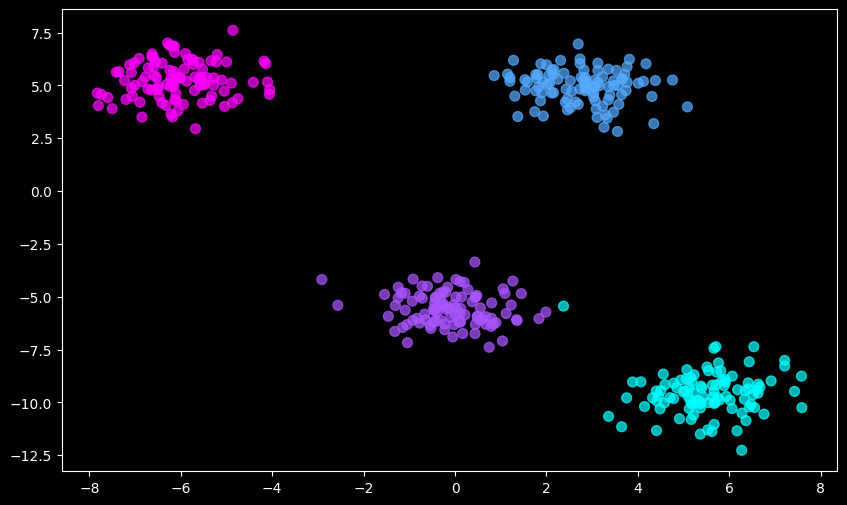

Epoch: [300 / 1000]  Accuracy: 0.998 Loss: 0.00000


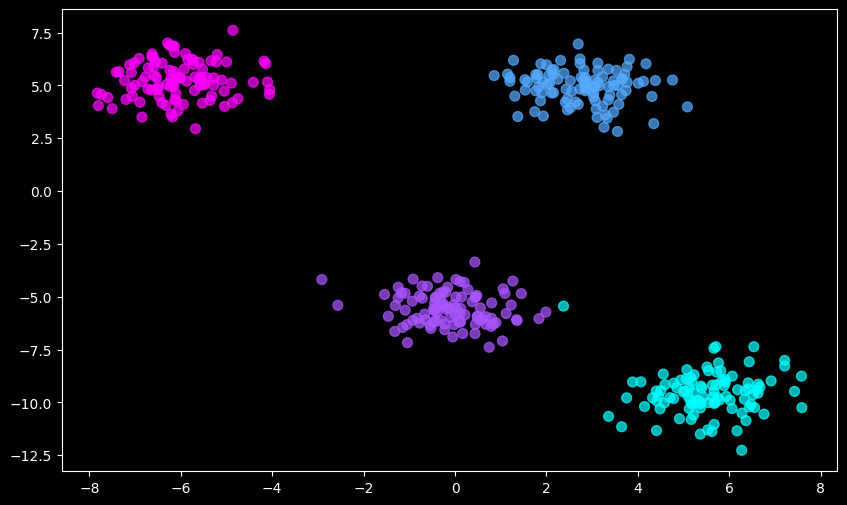

Epoch: [400 / 1000]  Accuracy: 0.998 Loss: 0.00000


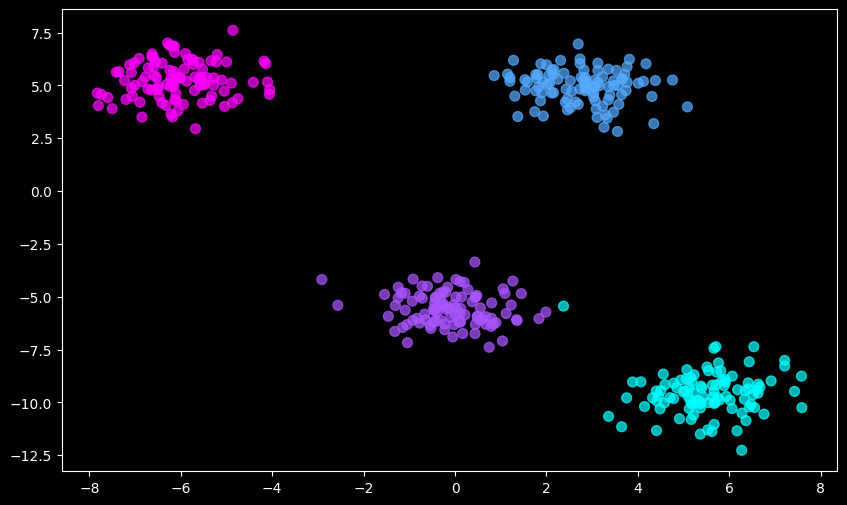

Epoch: [500 / 1000]  Accuracy: 0.998 Loss: 0.00000


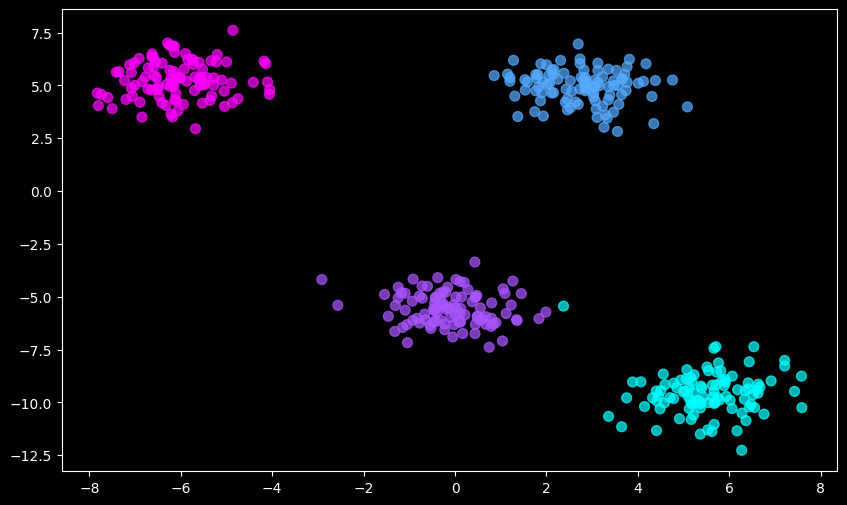

Epoch: [600 / 1000]  Accuracy: 0.998 Loss: 0.00000


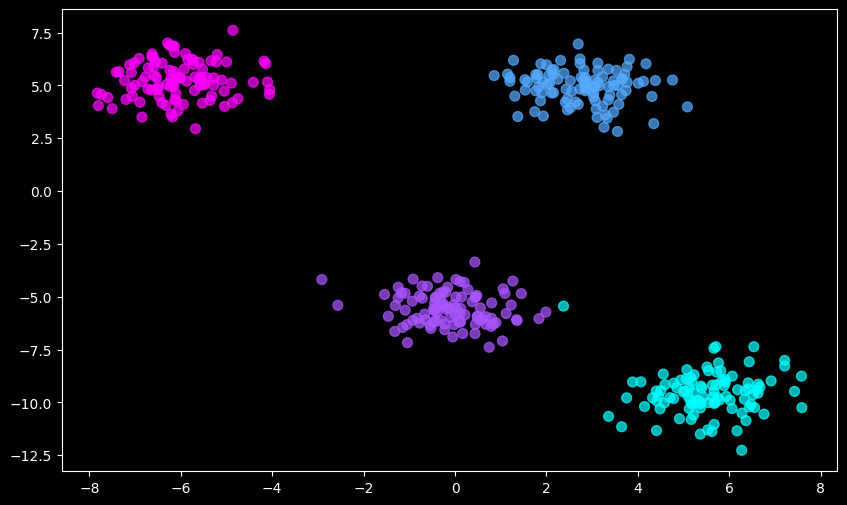

Epoch: [700 / 1000]  Accuracy: 0.998 Loss: 0.00000


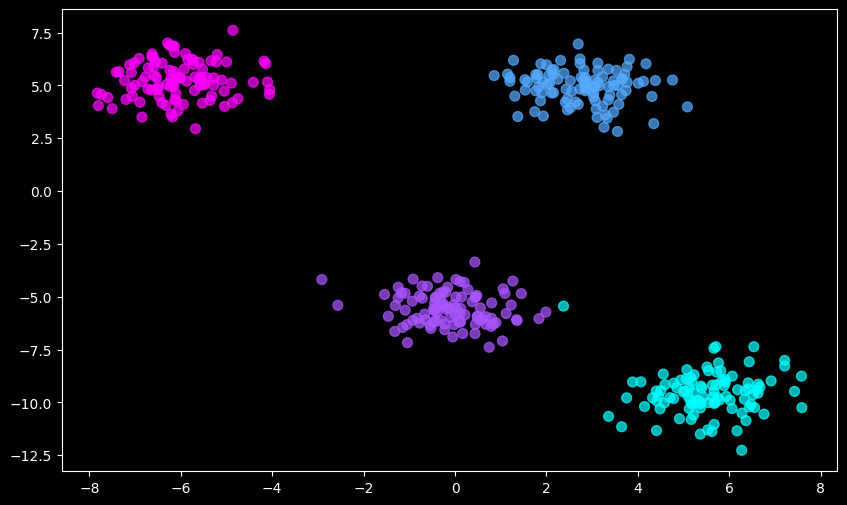

Epoch: [800 / 1000]  Accuracy: 0.998 Loss: 0.00000


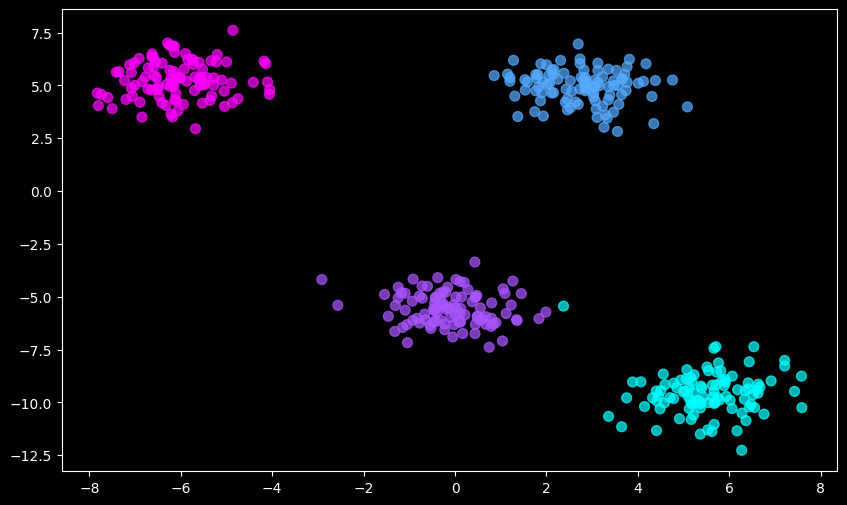

Epoch: [900 / 1000]  Accuracy: 1.000 Loss: 0.00000


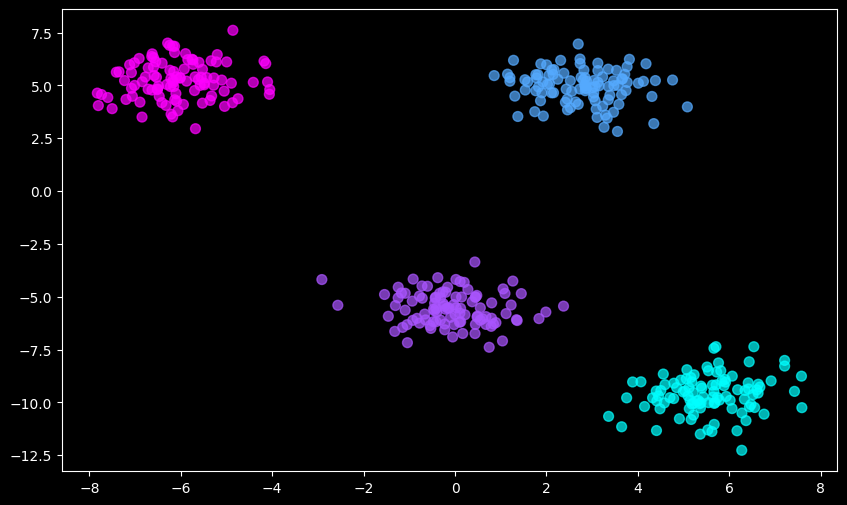

Epoch: [1000 / 1000]  Accuracy: 1.000 Loss: 0.00000


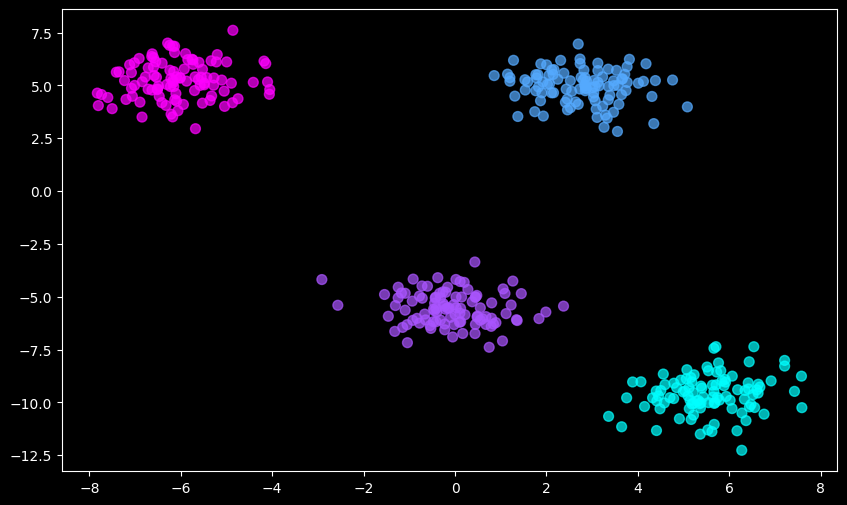

In [62]:
model = NnModel(x_, y_, hidden_neurons=hidden_neurons, output_neurons=output_neurons)
result = model.fit(1000, 0.001, show_plot = True)

# 3D

In [49]:
x_, y_ = datasets.make_blobs(n_samples=400, n_features=3, centers=4, random_state=50, cluster_std=0.9, shuffle=True)

In [46]:
x_.shape

(400, 3)

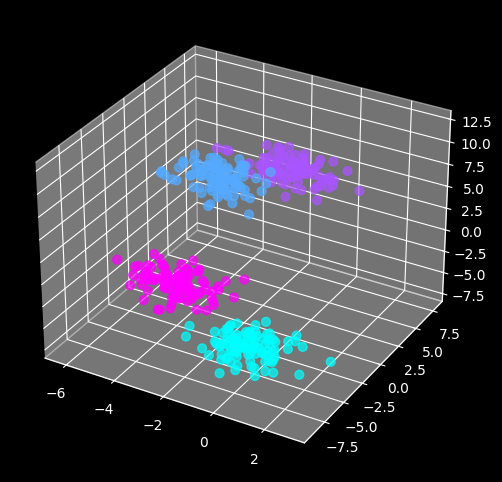

In [50]:
ax = plt.axes(projection = '3d')
ax.scatter3D(x_[:,0], x_[:,1], x_[:,2], s = 40, c = y_, cmap='cool', alpha=0.7)

## modelo

Epoch: [5 / 50]  Accuracy: 0.995 Loss: 0.00135


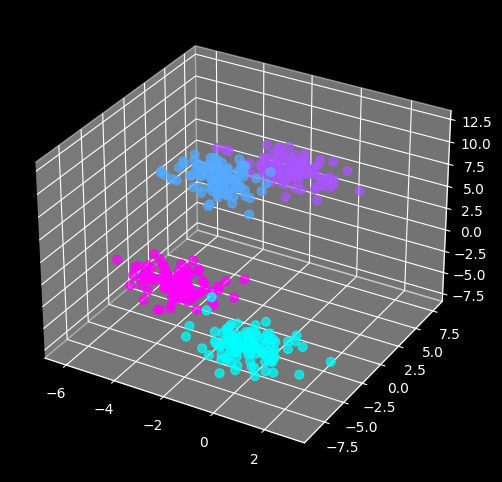

Epoch: [10 / 50]  Accuracy: 1.000 Loss: 0.00071


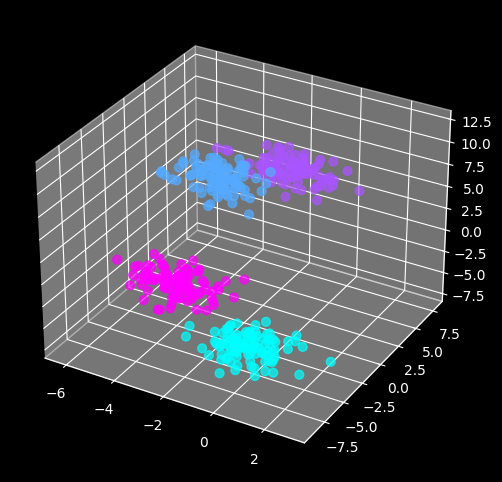

Epoch: [15 / 50]  Accuracy: 1.000 Loss: 0.00046


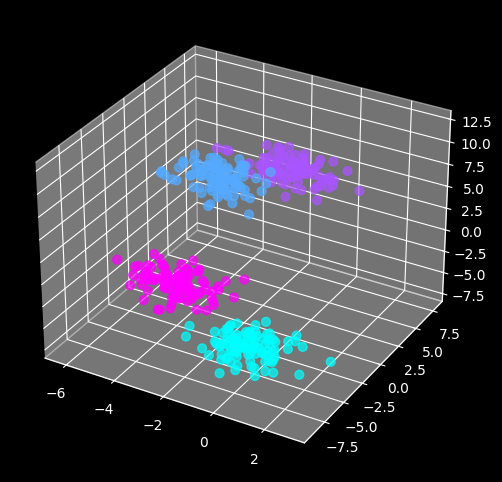

Epoch: [20 / 50]  Accuracy: 1.000 Loss: 0.00034


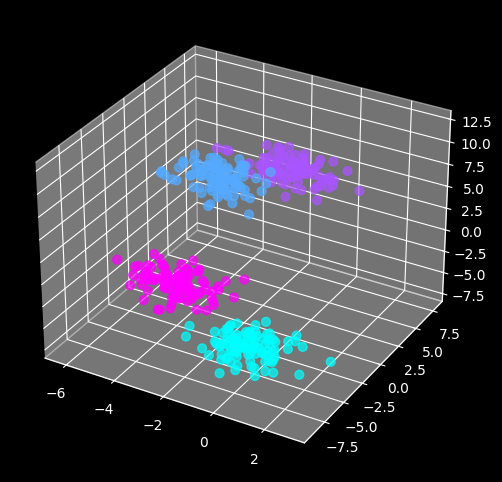

Epoch: [25 / 50]  Accuracy: 1.000 Loss: 0.00028


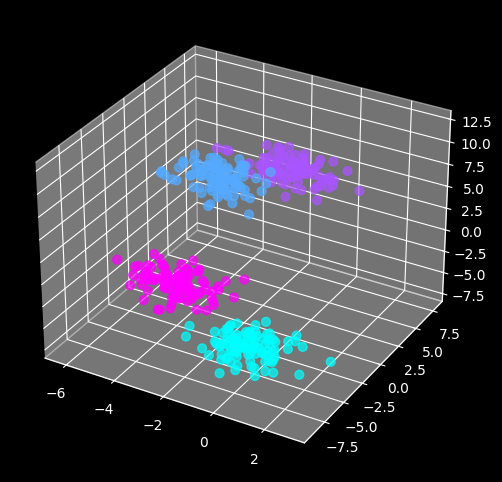

Epoch: [30 / 50]  Accuracy: 1.000 Loss: 0.00023


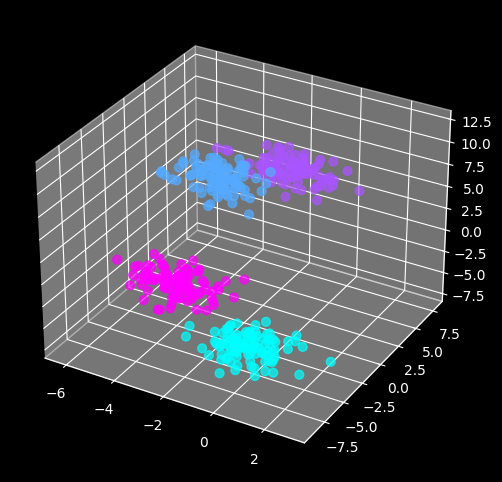

Epoch: [35 / 50]  Accuracy: 1.000 Loss: 0.00020


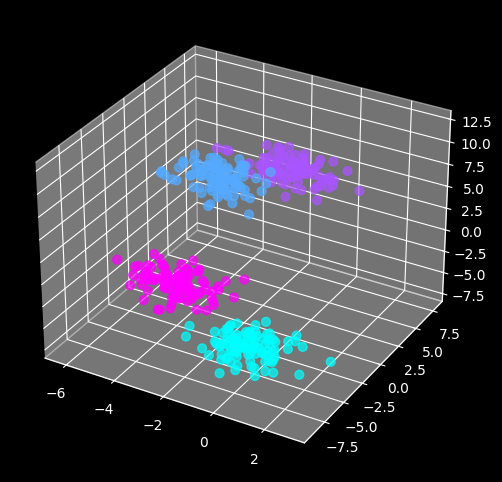

Epoch: [40 / 50]  Accuracy: 1.000 Loss: 0.00018


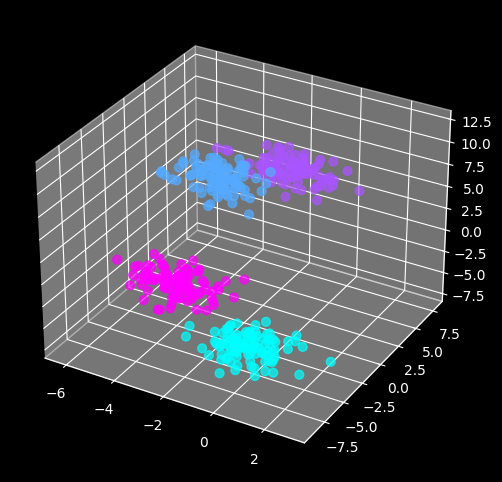

Epoch: [45 / 50]  Accuracy: 1.000 Loss: 0.00016


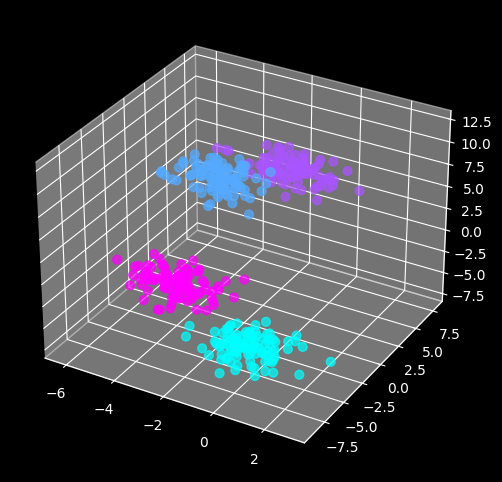

Epoch: [50 / 50]  Accuracy: 1.000 Loss: 0.00015


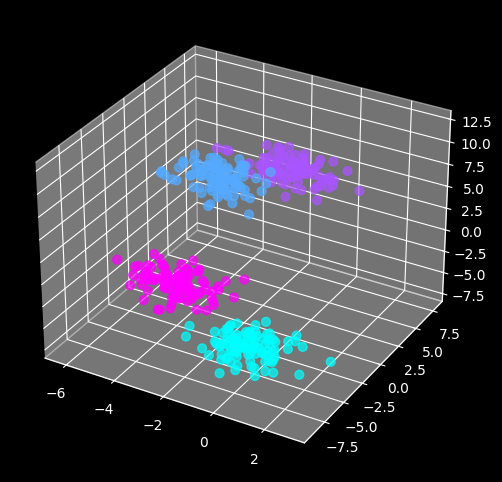

In [58]:
modelo_3d = NnModel(x_, y_, hidden_neurons = 10, output_neurons=4)
resultado_3d = modelo_3d.fit(50, 0.001, show_plot = True)

# Novo dataframe

In [63]:
df = datasets.load_breast_cancer(as_frame=True)

In [65]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [69]:
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [67]:
df['data'].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [95]:
a = np.array([1, 2, 3, 4, 5])
b = 2*a + 10 + 30*np.random.randn(a.shape[0])

In [96]:
cor_a_b = np.corrcoef(a,b)

<Axes: >

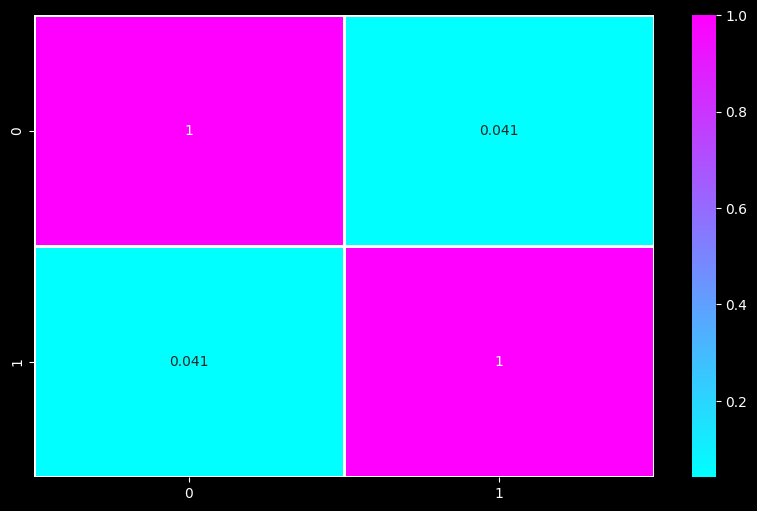

In [97]:
sns.heatmap(cor_a_b, annot=True, cmap='cool', linewidths=1)

In [72]:
np.unique(df.target, return_counts=True), df.target_names

((array([0, 1]), array([212, 357])),
 array(['malignant', 'benign'], dtype='<U9'))

In [73]:
for target, target_name in zip(np.unique(df.target), df.target_names):
  print(f'Classe: {target}\t Nome: {target_name}')

Classe: 0	 Nome: malignant
Classe: 1	 Nome: benign


In [74]:
df.data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [98]:
x_bc = df.data.to_numpy()[:, 4:9]
y_bc = df.target.to_numpy()

In [99]:
x_bc.shape, y_bc.shape

((569, 5), (569,))

In [111]:
bc = NnModel(x = x_bc, y = y_bc, hidden_neurons = 8, output_neurons = 2)
result_bc = bc.fit(epochs = 2000, lr =  0.0003)

Epoch: [200 / 2000]  Accuracy: 0.808 Loss: 0.00032
Epoch: [400 / 2000]  Accuracy: 0.873 Loss: 0.00008
Epoch: [600 / 2000]  Accuracy: 0.895 Loss: 0.00004
Epoch: [800 / 2000]  Accuracy: 0.895 Loss: 0.00003
Epoch: [1000 / 2000]  Accuracy: 0.896 Loss: 0.00003
Epoch: [1200 / 2000]  Accuracy: 0.896 Loss: 0.00002
Epoch: [1400 / 2000]  Accuracy: 0.900 Loss: 0.00002
Epoch: [1600 / 2000]  Accuracy: 0.902 Loss: 0.00002
Epoch: [1800 / 2000]  Accuracy: 0.903 Loss: 0.00002
Epoch: [2000 / 2000]  Accuracy: 0.910 Loss: 0.00002


In [113]:
print(mt.classification_report(y_bc, result_bc))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       212
           1       0.91      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.91      0.90      0.90       569
weighted avg       0.91      0.91      0.91       569



<Axes: >

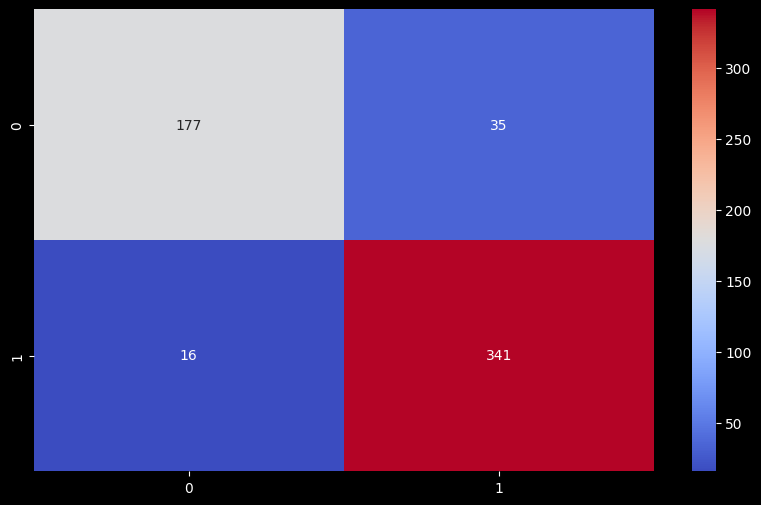

In [118]:
confusion_matrix = mt.confusion_matrix(y_bc, result_bc)
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='.0f')

In [119]:
# Criar o modelo salvo
with open('modelo_treinado.pickle', 'wb') as f:
  pickle.dump(bc, f)

In [120]:
# Carregar o modelo salvo
with open('/content/modelo_treinado.pickle', 'rb') as f:
  modelo_carregado = pickle.load(f)

In [130]:
np.round(modelo_carregado.forward(np.array([0.085, 0.064, 0.15, 0.21, 0.078])),3)

array([[0.999, 0.001]])